<a href="https://colab.research.google.com/github/bitanb1999/SXC_Dissertation/blob/main/SVM_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
!git clone https://github.com/swcwang/depression-detection.git
import numpy as np
import pandas as pd
df=pd.read_csv("/content/depression-detection/data/tweets_combined.csv").drop("Unnamed: 0",axis=1).rename(columns={"tweet":"Text_data","target":"Label"})
df.head()

Cloning into 'depression-detection'...
remote: Enumerating objects: 202, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 202 (delta 3), reused 12 (delta 0), pack-reused 178
Receiving objects: 100% (202/202), 1.54 MiB | 9.30 MiB/s, done.
Resolving deltas: 100% (99/99), done.


,Text_data,Label
0,Today in Selfcare: beauty &amp; laughs Kung Fu...,0
1,I get to spend New Year's home again alone and...,1
2,"Depressed and lonely /: Stuck in a deep, never...",1
3,If this is your response to someone saying the...,0
4,Apparently you get a free pass just by mention...,0


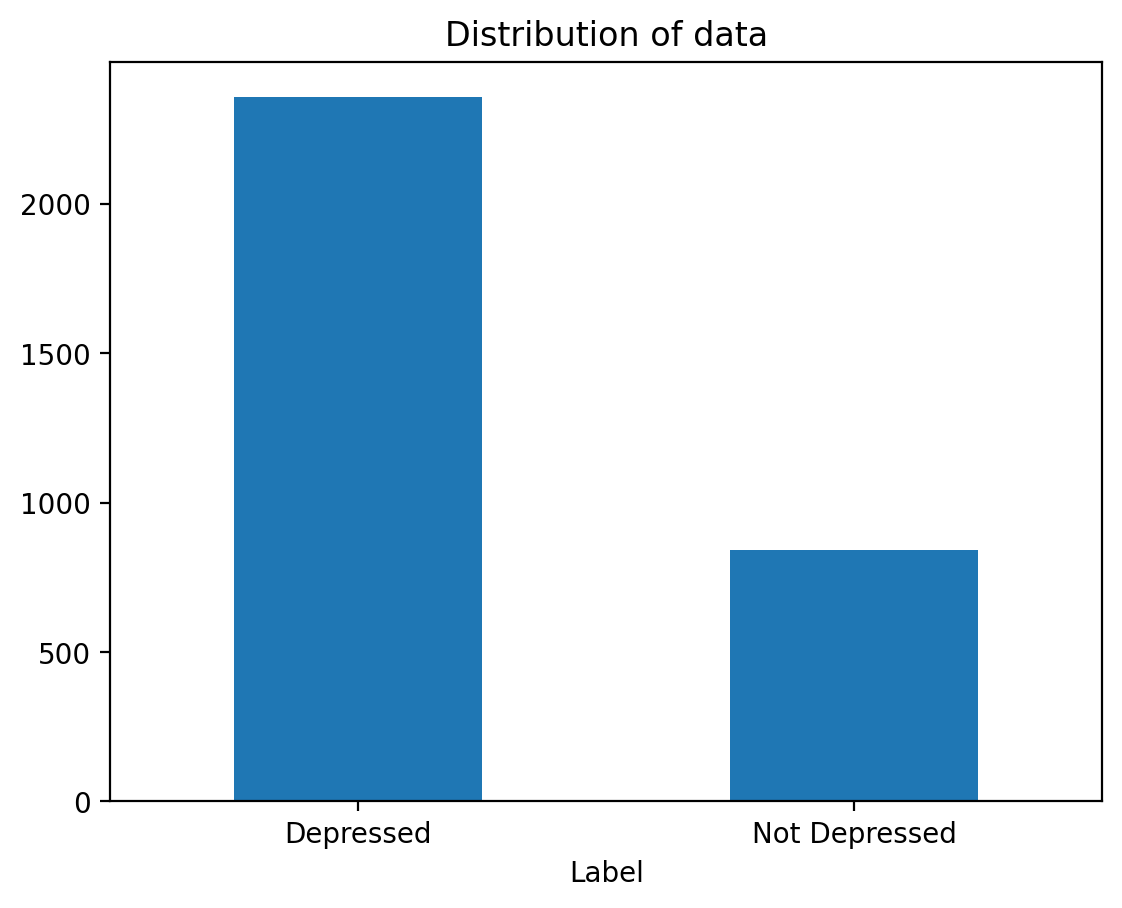

In [3]:
# Plotting the distribution for dataset.
ax = df.groupby('Label').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Depressed','Not Depressed'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['Text_data']), list(df['Label'])

In [4]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [5]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df['Text_data'] = df['Text_data'].apply(lambda text: cleaning_stopwords(text))
df['Text_data'].head()

0    Today Selfcare: beauty &amp; laughs Kung Fu Pa...
1       I get spend New Year's home alone lonely. ???•
2    Depressed lonely /: Stuck deep, never ending h...
3    If response someone saying they're dealing , y...
4    Apparently get free pass mentioning Where I fr...
Name: Text_data, dtype: object

In [6]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df['Text_data']= df['Text_data'].apply(lambda x: cleaning_punctuations(x))
df['Text_data'].tail()

3195    May new year abound H’s Health Hope Healing Ha...
3196                           It not beautiful day usual
3197    Compact Metal Leaf Grinder Four Layers pictwit...
3198        First Christmas YEARS I work doesnt feel same
3199    Its okay sus Let hurt go 🤗  thats hugging ya b...
Name: Text_data, dtype: object

In [7]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
df['Text_data'] = df['Text_data'].apply(lambda x:word_tokenize(x))
df['Text_data'].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0    [Today, Selfcare, beauty, amp, laughs, Kung, F...
1    [I, get, spend, New, Years, home, alone, lonel...
2    [Depressed, lonely, Stuck, deep, never, ending...
3    [If, response, someone, saying, theyre, dealin...
4    [Apparently, get, free, pass, mentioning, Wher...
Name: Text_data, dtype: object

In [8]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
df['Text_data']= df['Text_data'].apply(lambda x: stemming_on_text(x))
df['Text_data'].head()

0    [Today, Selfcare, beauty, amp, laughs, Kung, F...
1    [I, get, spend, New, Years, home, alone, lonel...
2    [Depressed, lonely, Stuck, deep, never, ending...
3    [If, response, someone, saying, theyre, dealin...
4    [Apparently, get, free, pass, mentioning, Wher...
Name: Text_data, dtype: object

In [9]:
nltk.download('wordnet')
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
df['Text_data'] = df['Text_data'].apply(lambda x: lemmatizer_on_text(x))
df['Text_data'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


0    [Today, Selfcare, beauty, amp, laughs, Kung, F...
1    [I, get, spend, New, Years, home, alone, lonel...
2    [Depressed, lonely, Stuck, deep, never, ending...
3    [If, response, someone, saying, theyre, dealin...
4    [Apparently, get, free, pass, mentioning, Wher...
Name: Text_data, dtype: object

In [10]:
X=df.Text_data
y=df.Label

In [11]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [22]:
X_train_vectorise=[" ".join(i) for i in X_train]

In [24]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train_vectorise)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  31086


In [26]:
X_train_vector = vectoriser.transform(X_train_vectorise)
X_test_vector  = vectoriser.transform([" ".join(i) for i in X_test])

In [29]:
def model_Evaluate(model):
  # Predict values for Test dataset
  y_pred = model.predict(X_test_vector)
  # Print the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))
  # Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['No Depression','Depression']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.75      0.99      0.86       121
           1       0.00      0.00      0.00        39

    accuracy                           0.75       160
   macro avg       0.38      0.50      0.43       160
weighted avg       0.57      0.75      0.65       160



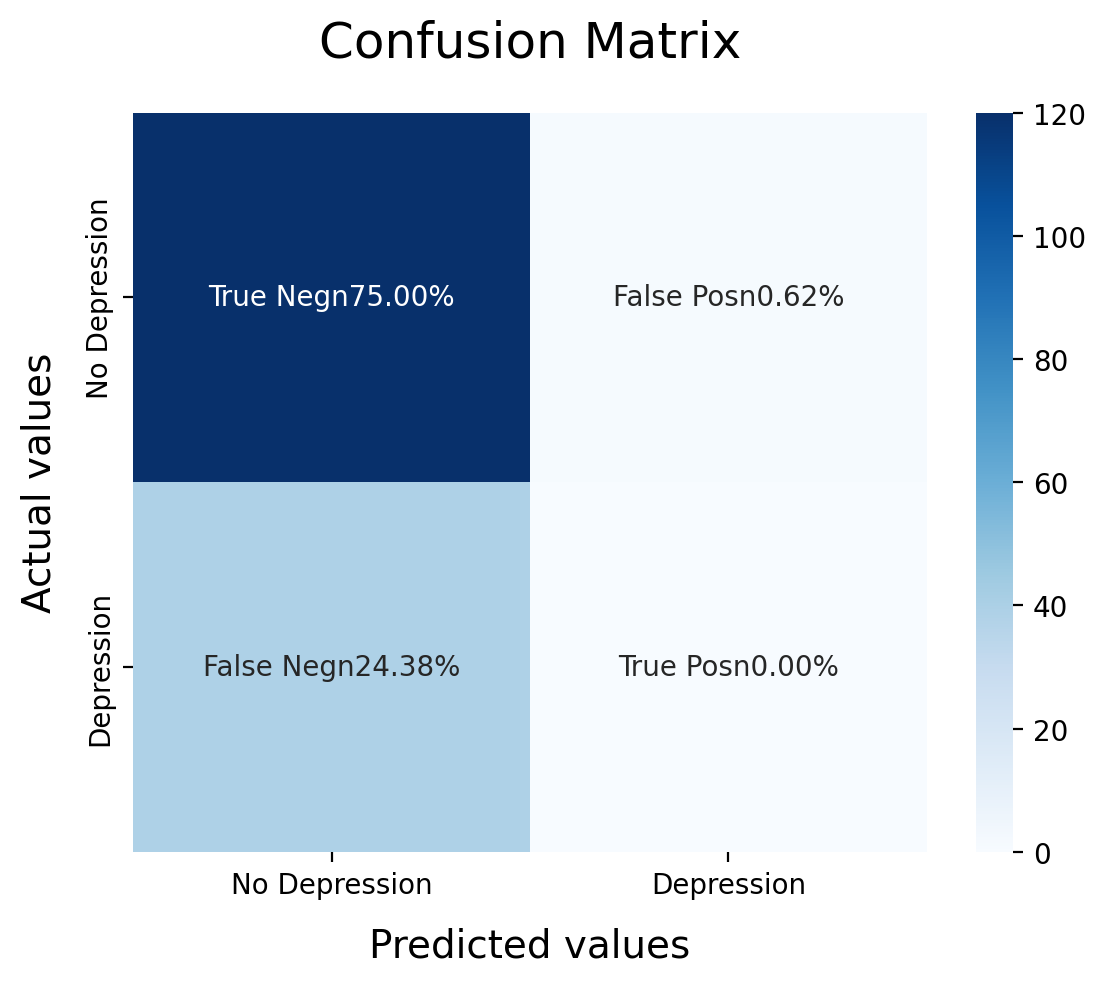

In [31]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train_vector, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test_vector)

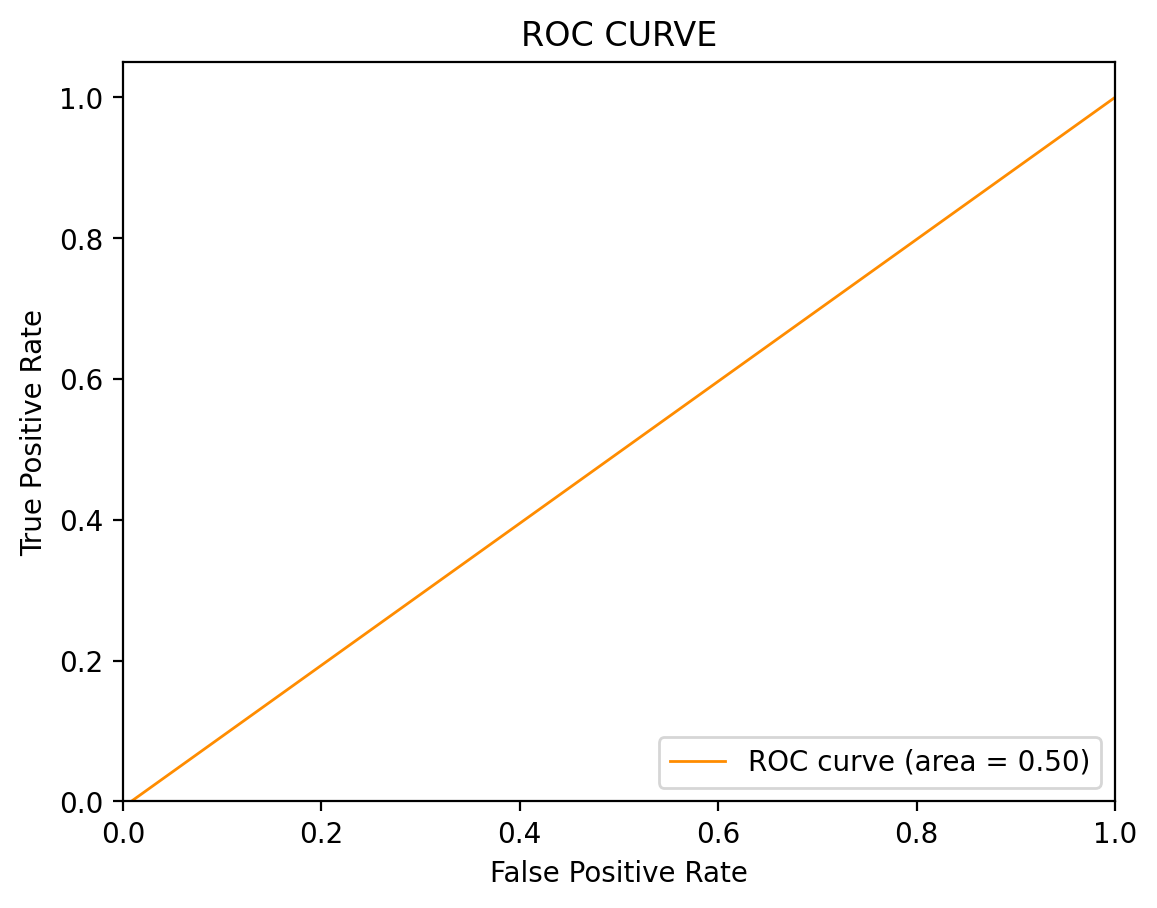

In [32]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       121
           1       0.55      0.62      0.58        39

    accuracy                           0.78       160
   macro avg       0.71      0.73      0.72       160
weighted avg       0.79      0.78      0.79       160



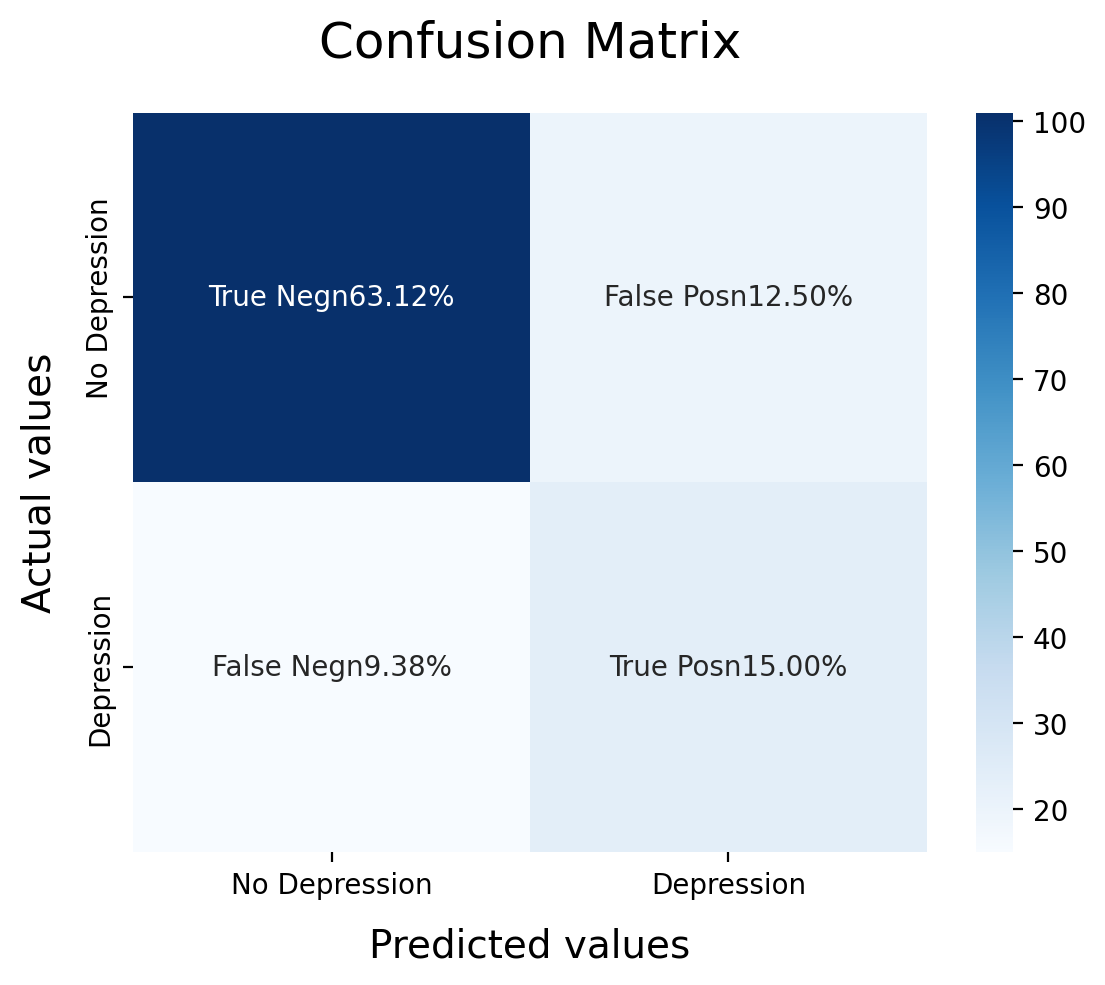

In [33]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train_vector, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test_vector)

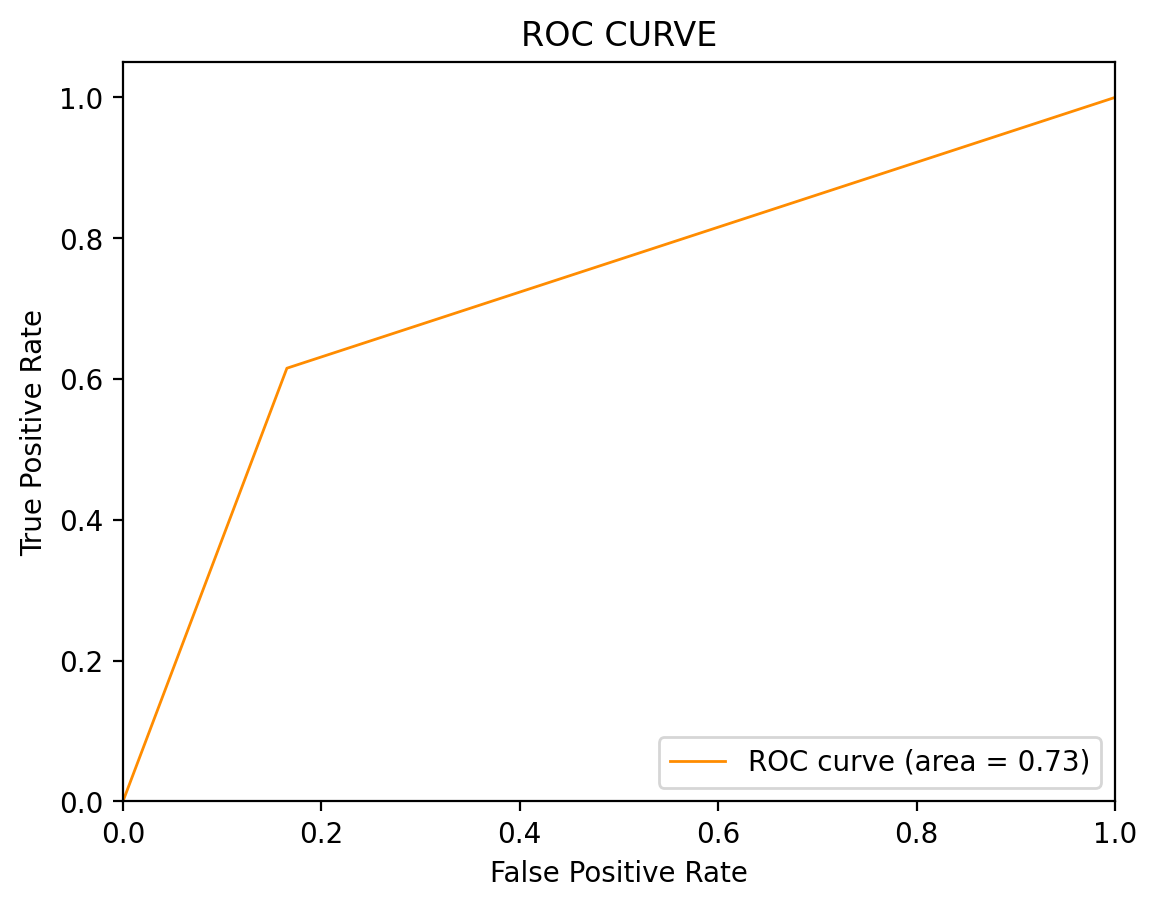

In [34]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.76      1.00      0.86       121
           1       0.00      0.00      0.00        39

    accuracy                           0.76       160
   macro avg       0.38      0.50      0.43       160
weighted avg       0.57      0.76      0.65       160



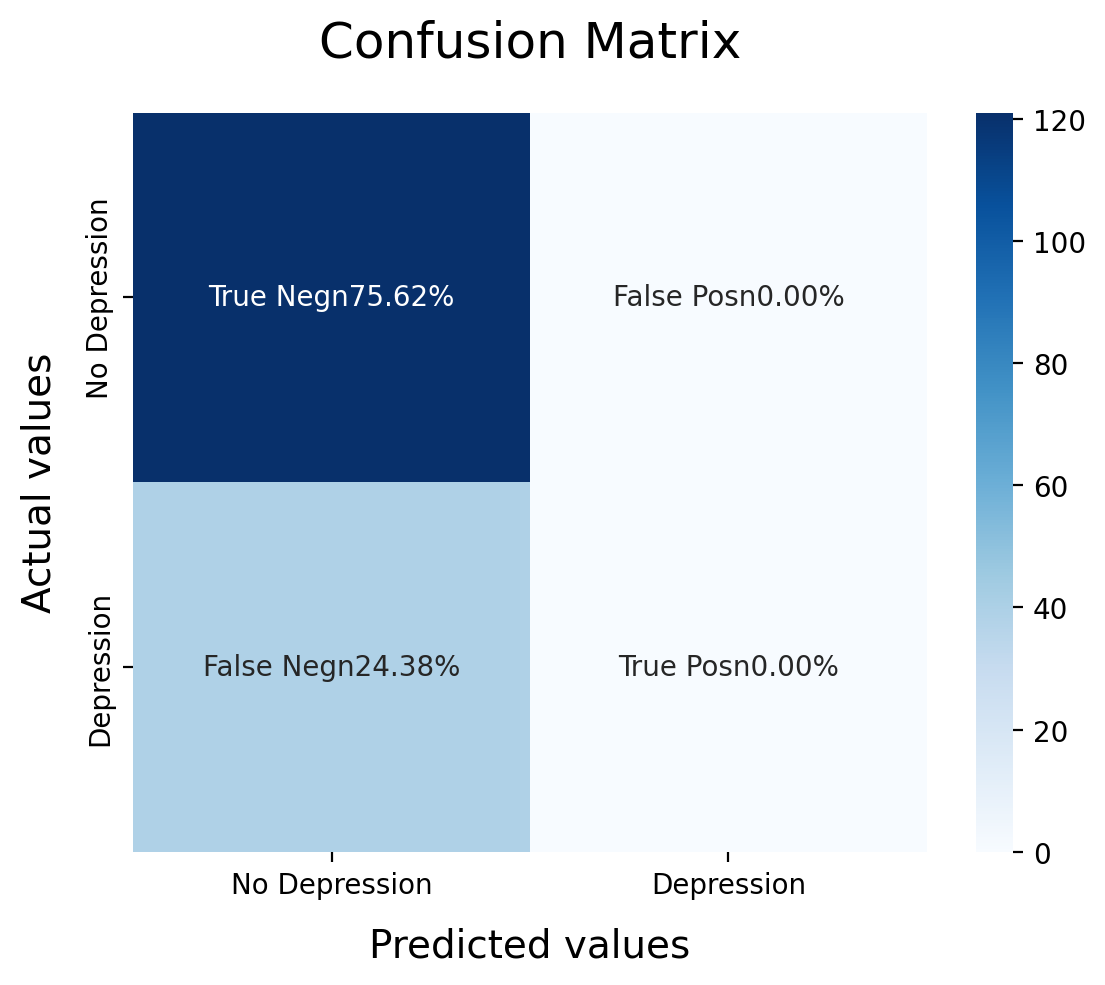

In [38]:
from sklearn.ensemble import RandomForestClassifier
RFmodel = RandomForestClassifier(max_depth=5, random_state=0,min_samples_leaf=3)
RFmodel.fit(X_train_vector, y_train)
model_Evaluate(RFmodel)
y_pred3 = RFmodel.predict(X_test_vector)

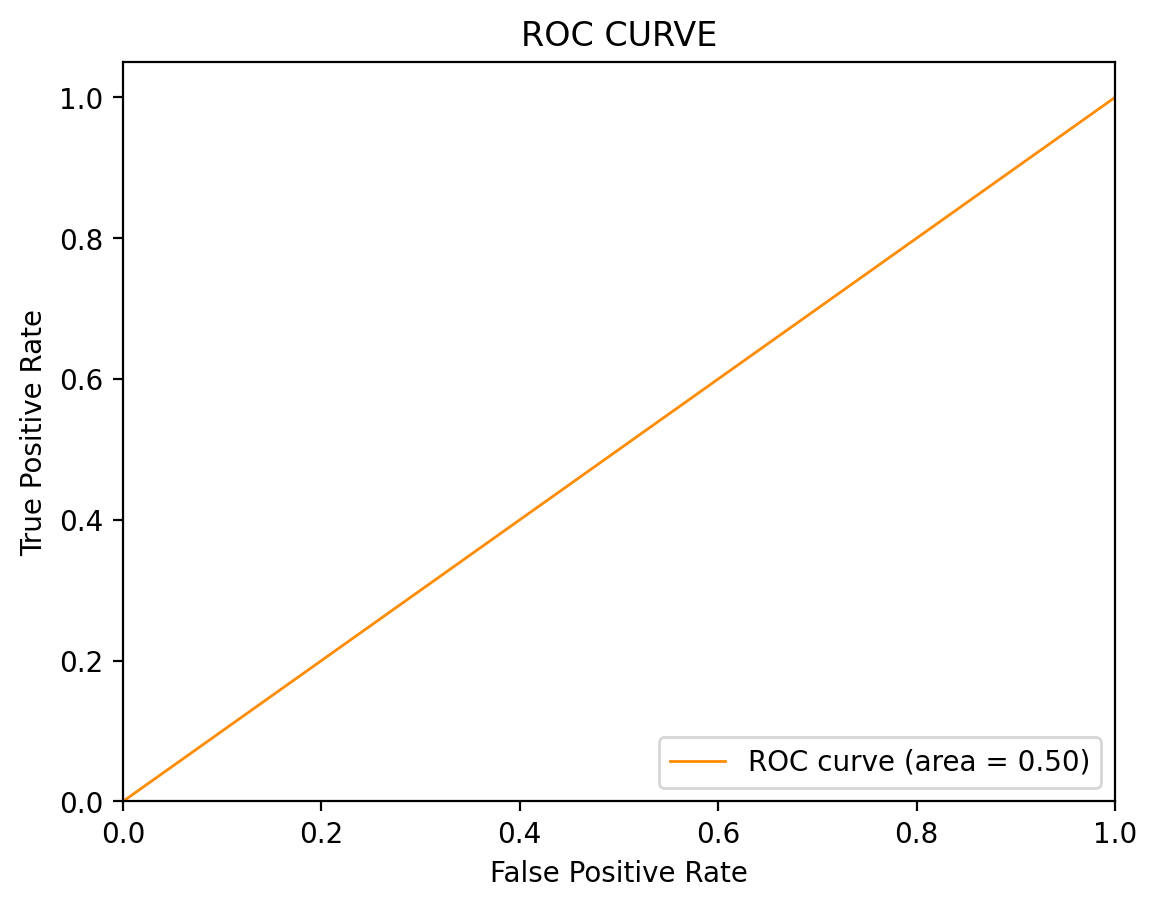

In [39]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()